In [34]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

In [8]:
def extract(path):
    data = pd.read_csv(path, sep=" |:|=", header=None)
    df = data.dropna(axis=1)
    place_holder=[]
    for i in df.columns:
        unique = df[i].nunique()
        if unique==1:
            place_holder.append(i)
    data_df = df.drop(place_holder,axis=1)

    df_ = data_df.T.reset_index(drop=True).T
    df2 =df_.drop(42,axis=1)
    data = df2.astype(np.float64)
    return data

path1 = "C:/Users/ALEXANDER/Documents/MQ2008/S1.txt"
path2 = "C:/Users/ALEXANDER/Documents/MQ2008/S2.txt"
path3 = "C:/Users/ALEXANDER/Documents/MQ2008/S3.txt"
path4 = "C:/Users/ALEXANDER/Documents/MQ2008/S4.txt"
path5 = "C:/Users/ALEXANDER/Documents/MQ2008/S5.txt"

In [9]:
df1 =extract(path1)
df2 = extract(path2)
df3 = extract(path3)
df4 = extract(path4)
df5 = extract(path5)
pdList = [df1, df2,df3,df4,df5] 
new_df = pd.concat(pdList)
new_df = new_df.reset_index(drop=True)
new_df

C:\Users\ALEXANDER\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,43,44
0,0.0,10002.0,0.007477,0.000000,1.000000,0.0,0.007470,0.471076,0.000000,1.000000,...,0.697327,0.721953,0.582568,0.000000,0.000000,0.000000,0.000000,0.007042,1.000000,0.086622
1,0.0,10002.0,0.603738,0.000000,1.000000,0.0,0.603175,0.000000,0.000000,0.122130,...,0.000000,0.117399,0.560607,0.000000,0.280000,0.003708,0.333333,1.000000,0.003159,0.089745
2,0.0,10002.0,0.214953,0.000000,0.000000,0.0,0.213819,0.401330,0.000000,0.000000,...,0.760916,0.746370,1.000000,0.000000,0.000000,1.000000,1.000000,0.021127,0.008419,0.099974
3,0.0,10002.0,0.000000,0.000000,1.000000,0.0,0.000000,0.458053,0.000000,0.495975,...,0.133604,0.000000,0.000000,0.250000,1.000000,0.000000,0.000000,0.000000,0.008419,0.044481
4,0.0,10002.0,1.000000,1.000000,0.000000,0.0,1.000000,0.347234,0.583054,0.000000,...,0.292567,0.385569,0.730347,1.000000,0.840000,0.184564,0.666667,0.000000,1.000000,0.041016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15206,0.0,19997.0,0.000000,0.000000,0.142857,0.0,0.000000,0.996014,0.000000,0.311266,...,0.000000,0.000000,0.000000,1.000000,0.682927,0.000000,0.000000,0.000000,1.000000,0.081029
15207,1.0,19997.0,0.007265,0.222222,0.571429,0.0,0.008321,1.000000,0.281416,0.597671,...,1.000000,0.798350,1.000000,0.666667,0.292683,0.018859,1.000000,0.263158,1.000000,0.321370
15208,1.0,19997.0,0.021795,0.000000,0.000000,0.0,0.021549,0.987896,0.000000,0.000000,...,0.663765,0.728664,0.826008,0.000000,0.000000,0.000796,0.125000,1.000000,0.015177,0.256996
15209,0.0,19997.0,0.075427,0.111111,0.000000,0.0,0.075315,0.958701,0.175035,0.000000,...,0.782719,0.864382,0.905313,0.333333,0.170732,0.000056,0.250000,0.473684,0.009288,0.283550


In [10]:
names = ["relevance","query_id"] + np.arange(1,41).tolist()+ ["inc","probability"]
new_df.columns=names
new_df.head()

,relevance,query_id,1,2,3,4,5,6,7,8,...,33,34,35,36,37,38,39,40,inc,probability
0,0.0,10002.0,0.007477,0.0,1.0,0.0,0.007470,0.471076,0.000000,1.000000,...,0.697327,0.721953,0.582568,0.00,0.00,0.000000,0.000000,0.007042,1.000000,0.086622
1,0.0,10002.0,0.603738,0.0,1.0,0.0,0.603175,0.000000,0.000000,0.122130,...,0.000000,0.117399,0.560607,0.00,0.28,0.003708,0.333333,1.000000,0.003159,0.089745
2,0.0,10002.0,0.214953,0.0,0.0,0.0,0.213819,0.401330,0.000000,0.000000,...,0.760916,0.746370,1.000000,0.00,0.00,1.000000,1.000000,0.021127,0.008419,0.099974
3,0.0,10002.0,0.000000,0.0,1.0,0.0,0.000000,0.458053,0.000000,0.495975,...,0.133604,0.000000,0.000000,0.25,1.00,0.000000,0.000000,0.000000,0.008419,0.044481
4,0.0,10002.0,1.000000,1.0,0.0,0.0,1.000000,0.347234,0.583054,0.000000,...,0.292567,0.385569,0.730347,1.00,0.84,0.184564,0.666667,0.000000,1.000000,0.041016


In [11]:
relevance = new_df['relevance']
new_df.drop(['relevance','probability'],axis=1,inplace=True)

In [12]:
from sklearn.model_selection import GroupShuffleSplit

gss = GroupShuffleSplit(test_size=.3, n_splits=3, random_state = 52)

for train_idx, test_idx in gss.split(new_df, relevance, groups=new_df['query_id']):
    print("TRAIN:", train_idx, "TEST:", test_idx)

TRAIN: [    0     1     2 ... 15208 15209 15210] TEST: [   24    25    26 ... 15201 15202 15203]
TRAIN: [    0     1     2 ... 15208 15209 15210] TEST: [    8     9    10 ... 15115 15116 15117]
TRAIN: [    0     1     2 ... 15208 15209 15210] TEST: [  182   183   184 ... 15004 15005 15006]


In [13]:
train_set = new_df.iloc[train_idx]
test_set = new_df.iloc[test_idx]
X_train = train_set.loc[:, ~train_set.columns.isin(['query_id'])]
y_train = relevance.iloc[train_idx]

In [14]:
eval_groups = test_set.groupby('query_id').size().to_frame('size')['size'].to_numpy()
groups = train_set.groupby('query_id').size().to_frame('size')['size'].to_numpy()

#We need to keep the id for later predictions
X_test = test_set.loc[:, ~test_set.columns.isin(['query_id'])]
y_test = relevance.iloc[test_idx]

In [28]:
model = lgb.LGBMRanker(
    objective="lambdarank",colsample_bytree=0.9,
    metric="ndcg",random_state=54,
    subsample=0.8,learning_rate=0.1,
    n_estimators=500
)

In [31]:
model.fit(
    X=X_train,
    y=y_train,
    group=groups,
    eval_set=[(X_test, y_test)],
    eval_group=[eval_groups] ,
    eval_at=10,
    verbose=10,early_stopping_rounds=50
)


C:\Users\ALEXANDER\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's ndcg@10: 0.778845
[20]	valid_0's ndcg@10: 0.78576
[30]	valid_0's ndcg@10: 0.786526
[40]	valid_0's ndcg@10: 0.785514
[50]	valid_0's ndcg@10: 0.78457
[60]	valid_0's ndcg@10: 0.784629
[70]	valid_0's ndcg@10: 0.779965
[80]	valid_0's ndcg@10: 0.780545


LGBMRanker(colsample_bytree=0.9, metric='ndcg', n_estimators=500,
           objective='lambdarank', random_state=54, subsample=0.8)

In [32]:
predictions = model.predict(test_set.loc[:, ~test_set.columns.isin(['query_id'])])
predictions.shape,y_test.shape

from sklearn.metrics import ndcg_score
ndcg_value = ndcg_score(np.asarray([y_test]), np.asarray([predictions]))
print(f'The Normalized Discounted Cummulative Gain === {ndcg_value}')
# from sklearn.metrics import average_precision_score
# average_precision_score(y_test,predictions)

The Normalized Discounted Cummulative Gain === 0.8368911498798813


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

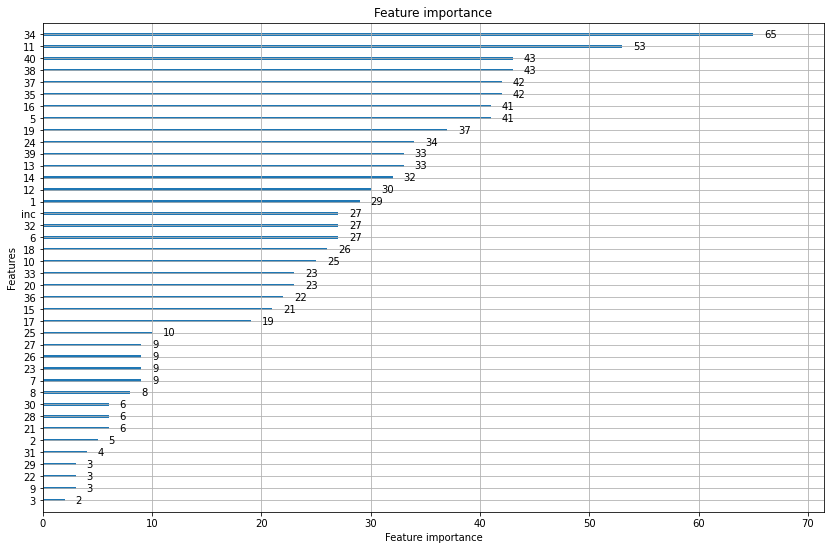

In [35]:
#plotting the importance and trees
plt.rcParams["figure.figsize"] = (14, 9)
lgb.plot_importance(model)